In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm

In [2]:
#MEI, CO2, CH4, N2O, CFC.11, CFC.12, TSI, and Aerosols as independent variables
train = pd.read_csv('climate_change.csv')
train.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [4]:
train_X = train[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
train_y = train['Temp']

In [5]:
#Problem 1.1 - Creating Our First Model
#R2 score
model = LinearRegression().fit(train_X, train_y)
model.score(train_X, train_y)

0.7439939571287763

In [12]:
#Problem 1.2 - Creating Our First Model
model_ols = sm.OLS(train_y, train_X).fit().summary()
print(model_ols)

                                 OLS Regression Results                                
Dep. Variable:                   Temp   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              353.2
Date:                Mon, 27 Dec 2021   Prob (F-statistic):                   9.12e-148
Time:                        18:07:08   Log-Likelihood:                          281.75
No. Observations:                 308   AIC:                                     -547.5
Df Residuals:                     300   BIC:                                     -517.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

N20???

<AxesSubplot:>

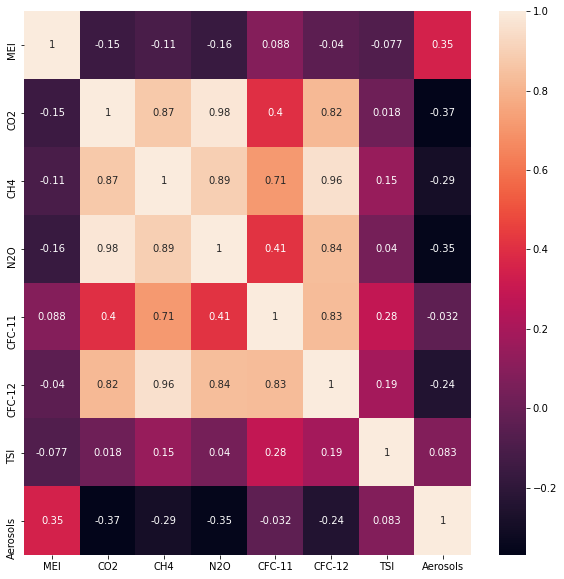

In [15]:
#Problem 2.2 - Understanding the Model
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(train_X.corr(), annot=True)

In [17]:
#Problem 3 - Simplifying the Model
#build a model with only MEI, TSI, Aerosols and N2O as independent variables
train_X2 = train[['MEI', 'TSI', 'Aerosols', 'N2O']]
train_y2 = train['Temp']

In [18]:
model_ols2 = sm.OLS(train_y2, train_X2).fit().summary()

In [19]:
print(model_ols2)

                                 OLS Regression Results                                
Dep. Variable:                   Temp   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              627.7
Date:                Mon, 27 Dec 2021   Prob (F-statistic):                   1.66e-145
Time:                        18:19:16   Log-Likelihood:                          263.56
No. Observations:                 308   AIC:                                     -519.1
Df Residuals:                     304   BIC:                                     -504.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
model2 = LinearRegression().fit(train_X2, train_y2)
model2.score(train_X2, train_y2)

0.7161258925159397